Importing libraries

In [1]:
import numpy as Numpy
import pandas as Pandas

import matplotlib.pyplot as PyPlot

import seaborn as sns
from seaborn import heatmap, histplot

### Fraudulent and valid transactions

In [2]:
cardsData = Pandas.read_csv('./card_transdata.csv')

print(cardsData.head())
print(cardsData.shape)

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  
(1000000, 8)


In [3]:
features = cardsData.columns.values
print("Features: ")
[print('\t' + feature) for feature in features]

Features: 
	distance_from_home
	distance_from_last_transaction
	ratio_to_median_purchase_price
	repeat_retailer
	used_chip
	used_pin_number
	online_order
	fraud


[None, None, None, None, None, None, None, None]

In [4]:
print(cardsData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None


Let's find out the general information about the data set

Looks like data doesn't contain any empty cells, but let's try to check for empty cells

In [5]:
distanceFromHome = "distance_from_home"
distanceFromLastTransaction = "distance_from_last_transaction"
ratioToMedianPurchasePrice = "ratio_to_median_purchase_price"
repeatRetailer = "repeat_retailer"
usedChip = "used_chip"
usedPin = "used_pin_number"
isOnlineOrder = "online_order"
isFraud = "fraud"

In [6]:
cardsDataNoNa = cardsData.dropna(subset=["fraud"]);
print(cardsDataNoNa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None


No empty cells indeed

Let's see if there are any duplicates:

In [7]:
print(cardsData.duplicated().value_counts())

False    1000000
Name: count, dtype: int64


No duplicated data.

Pairwise correlation of columns

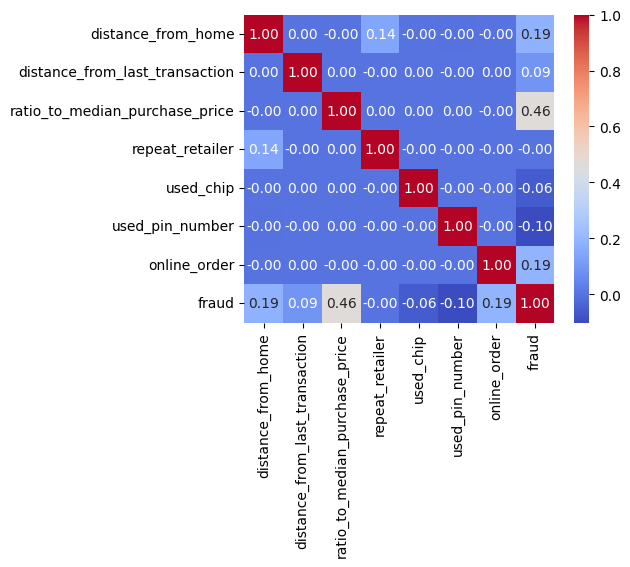

In [8]:
correlation = cardsData.corr()
fig, ax = PyPlot.subplots(figsize=(5, 4))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")
PyPlot.show()

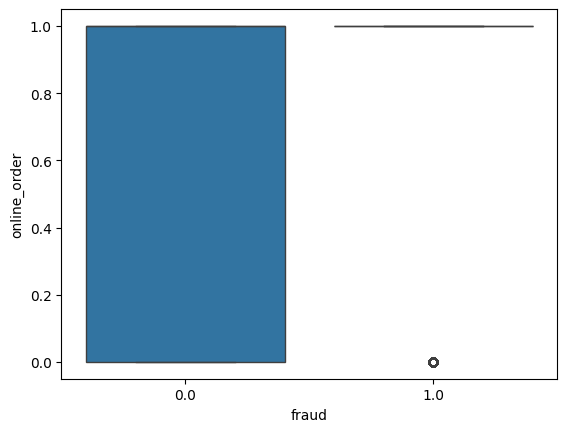

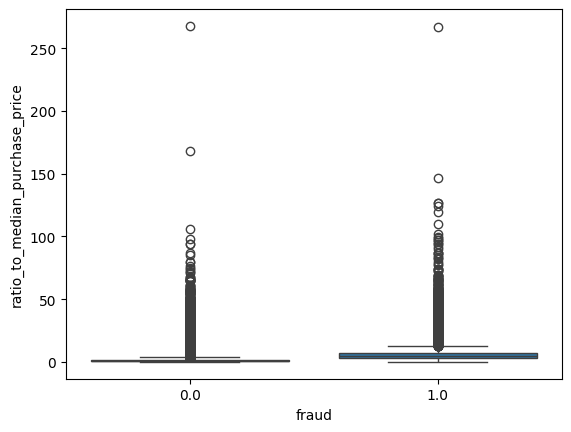

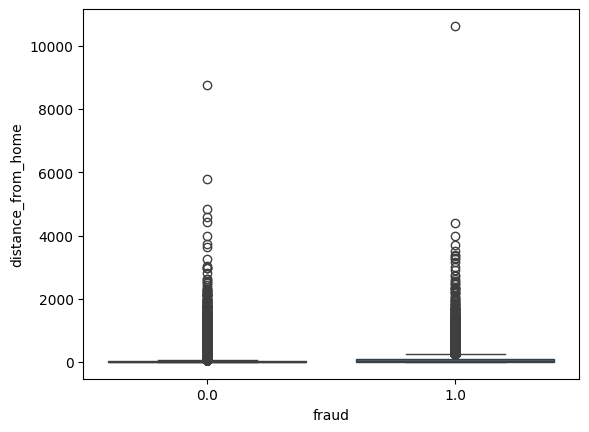

In [9]:

figureOnlineOrder = PyPlot.figure()
axOnlineOrder = sns.boxplot(x = isFraud, y = isOnlineOrder, data = cardsData)

figureRatioToPrices = PyPlot.figure()
axRatioToPrices = sns.boxplot(x = isFraud, y = ratioToMedianPurchasePrice, data = cardsData)

figureFarFromHome = PyPlot.figure()
axFarFromHome = sns.boxplot(x = isFraud, y = distanceFromHome, data = cardsData)


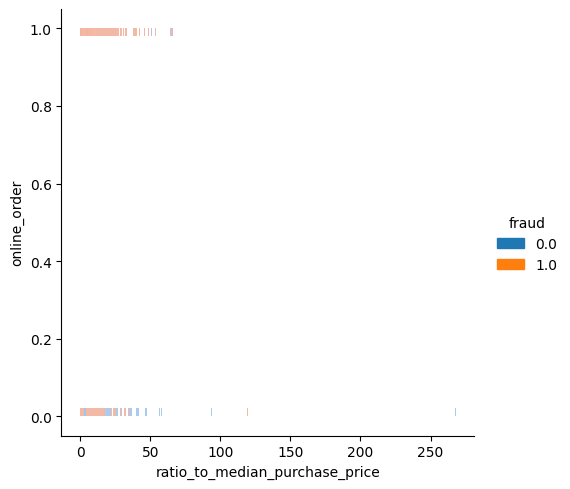

In [11]:
sns.displot(cardsData, x = ratioToMedianPurchasePrice, y = isOnlineOrder, hue = isFraud)

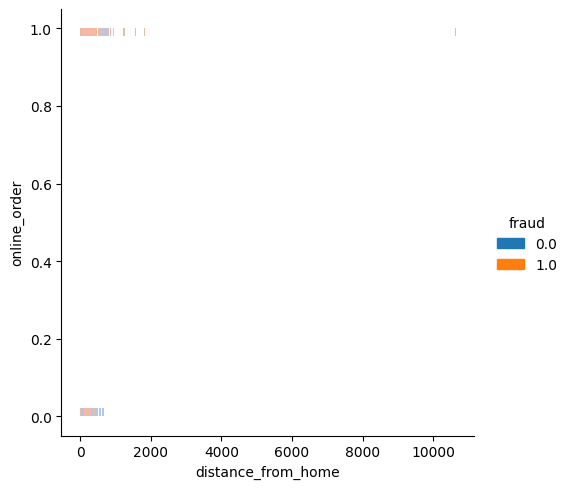

In [12]:
sns.displot(cardsData, x = distanceFromHome, y = isOnlineOrder, hue = isFraud)

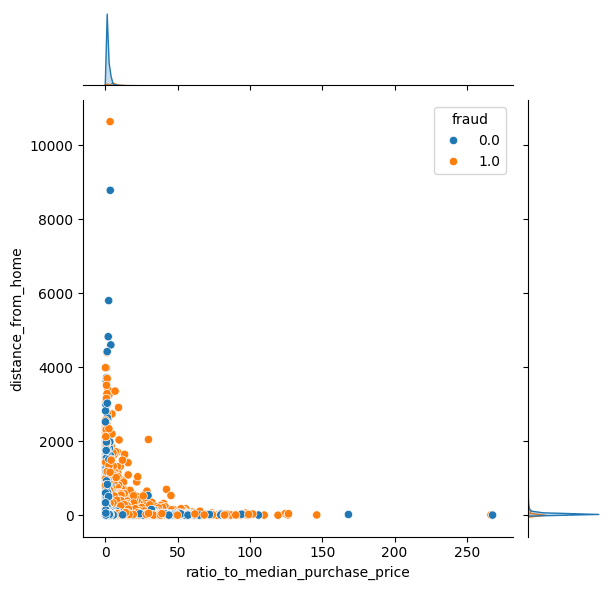

In [13]:
sns.jointplot(data=cardsData, x=ratioToMedianPurchasePrice, y=distanceFromHome, hue = isFraud)

In [14]:
cardsData = cardsData.loc[cardsData[ratioToMedianPurchasePrice] <= 100]


cardsData = cardsData.loc[cardsData[distanceFromHome] <= 350]
cardsData.shape

(994378, 8)

In [15]:

cardsData = cardsData.loc[cardsData[ratioToMedianPurchasePrice] <= 17]
cardsData.shape


cardsData = cardsData.loc[cardsData[distanceFromHome] <= 150]
cardsData.shape

(968756, 8)

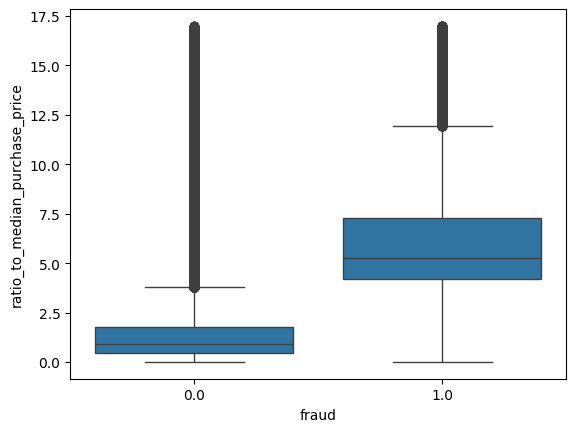

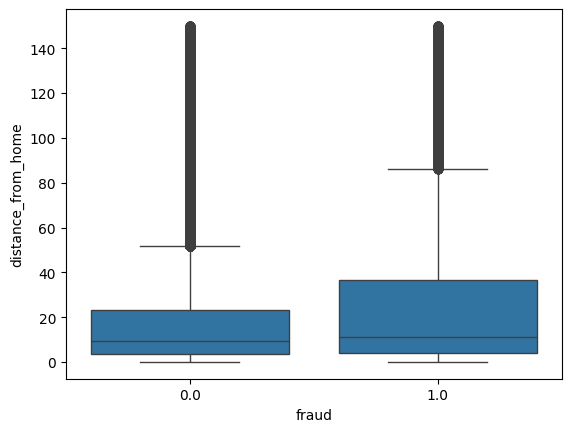

In [16]:


figureRatioToPrices = PyPlot.figure()
axRatioToPrices = sns.boxplot(x = isFraud, y = ratioToMedianPurchasePrice, data = cardsData)

figureFarFromHome = PyPlot.figure()
axFarFromHome = sns.boxplot(x = isFraud, y = distanceFromHome, data = cardsData)


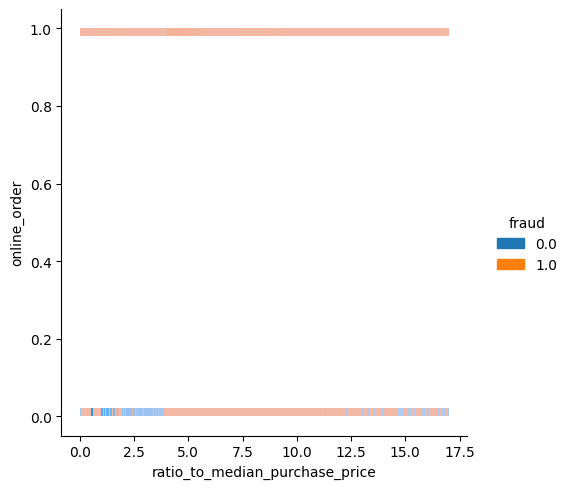

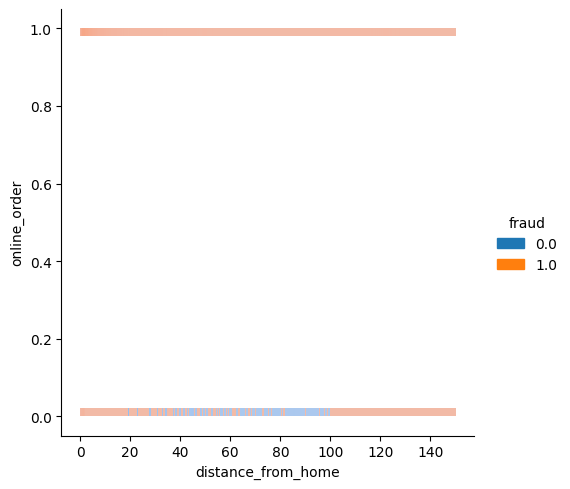

In [17]:

sns.displot(cardsData, x = ratioToMedianPurchasePrice, y = isOnlineOrder, hue = isFraud)
sns.displot(cardsData, x = distanceFromHome, y = isOnlineOrder, hue = isFraud)



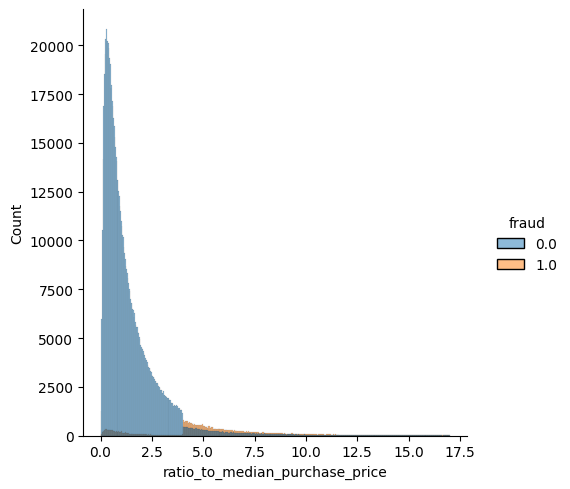

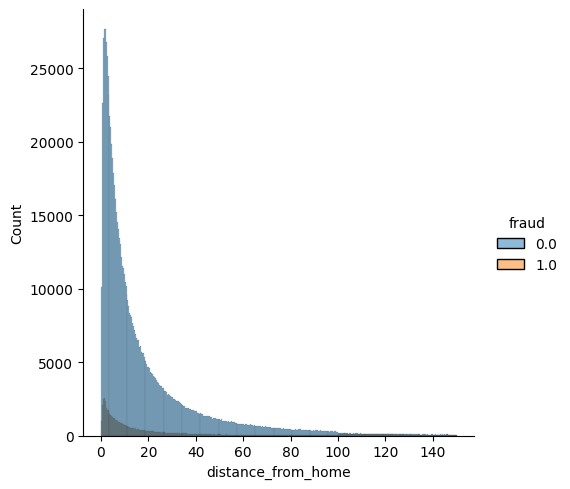

In [18]:
sns.displot(cardsData, x = ratioToMedianPurchasePrice, hue = isFraud)
sns.displot(cardsData, x = distanceFromHome, hue = isFraud)


C:\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


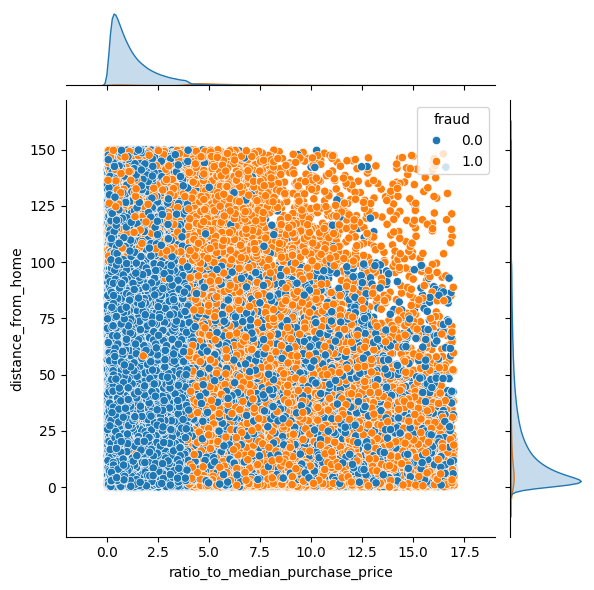

In [89]:

sns.jointplot(data=cardsData, x=ratioToMedianPurchasePrice, y=distanceFromHome, hue = isFraud)

# Classification

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [19]:
cardsData.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [45]:
X = cardsData.drop([isFraud, usedChip, usedPin, repeatRetailer], axis = 1)
y = cardsData[isFraud]

In [46]:
set(y)

{0.0, 1.0}

In [47]:
print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(968756, 4) (968756,)


## Train Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [49]:
print(type(X), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(678129, 4) (678129,)


## Decision Tree 

In [127]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [128]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [129]:
y_pred = model.predict(X_test)

## Model Evaluation

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    268894
         1.0       0.83      0.91      0.87     21733

    accuracy                           0.98    290627
   macro avg       0.91      0.95      0.93    290627
weighted avg       0.98      0.98      0.98    290627



In [131]:
print(confusion_matrix(y_test, y_pred))

[[264944   3950]
 [  1896  19837]]


## Visualization

In [132]:
model.feature_names_in_

array(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'online_order'], dtype=object)

In [133]:
model.classes_

array([0., 1.])

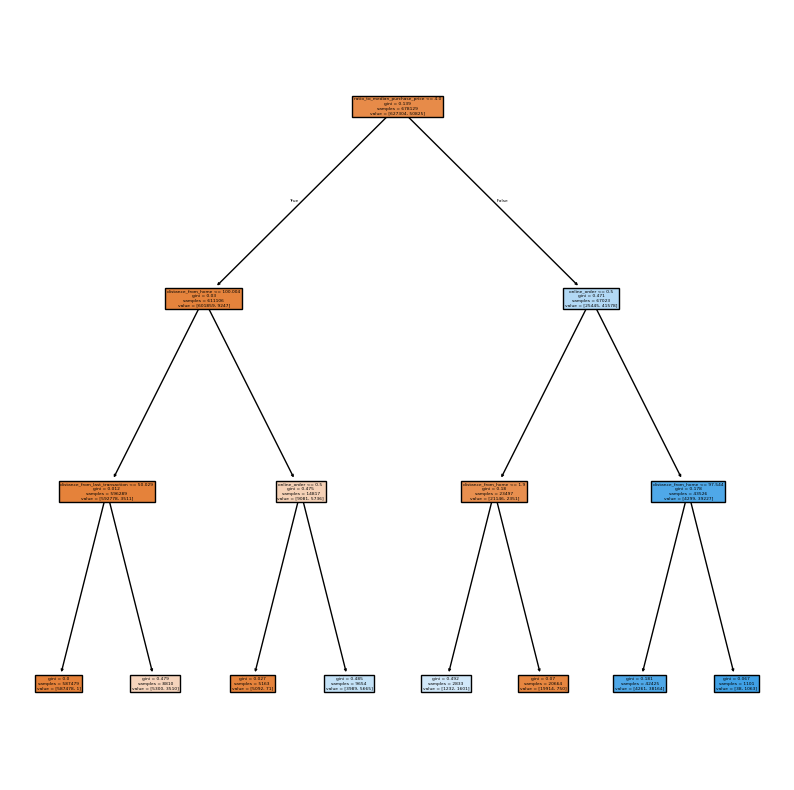

In [134]:
PyPlot.figure(figsize = (10, 10))
plot_tree(model, feature_names = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'online_order'],  filled = True)
PyPlot.savefig('decision_tree.jpg', format='jpg', dpi=600, bbox_inches='tight') 
PyPlot.show()

## Random Forest

In [158]:
rf_classifier = RandomForestClassifier(
    n_estimators = 10,
    criterion = "gini",
    max_depth = 5,
    max_samples=0.8,
    random_state=34)

In [159]:
rf_classifier.fit(X_train, y_train)
Y_pred_rf = rf_classifier.predict(X_test)

In [160]:
accuracy_rf = accuracy_score(y_test, Y_pred_rf)

In [161]:
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.9821


In [162]:
print(classification_report(y_test, Y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    268894
         1.0       0.82      0.97      0.89     21733

    accuracy                           0.98    290627
   macro avg       0.91      0.97      0.94    290627
weighted avg       0.98      0.98      0.98    290627



In [163]:
print(confusion_matrix(y_test, Y_pred_rf))

[[264431   4463]
 [   728  21005]]


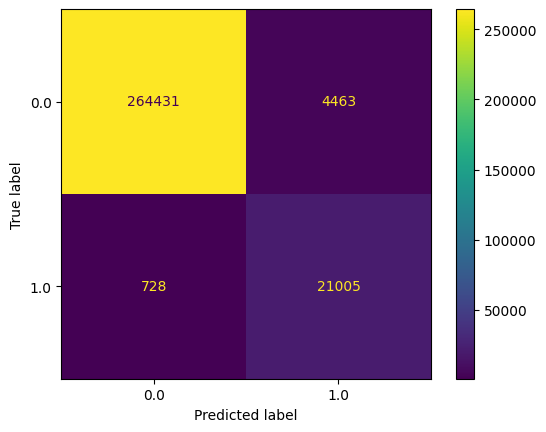

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay
confusionMatrix = confusion_matrix(y_test, Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,
                              display_labels=rf_classifier.classes_)
disp.plot()

## K Nearest Neighbors

In [165]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [167]:
scaler = StandardScaler()

In [168]:
scaler.fit(X_train)

StandardScaler()

In [169]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [170]:
knn = KNeighborsClassifier(n_neighbors=5)

In [171]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [172]:
pred = knn.predict(scaled_X_test)

In [173]:
print(confusion_matrix(y_test,pred))

[[265070   3824]
 [  1949  19784]]


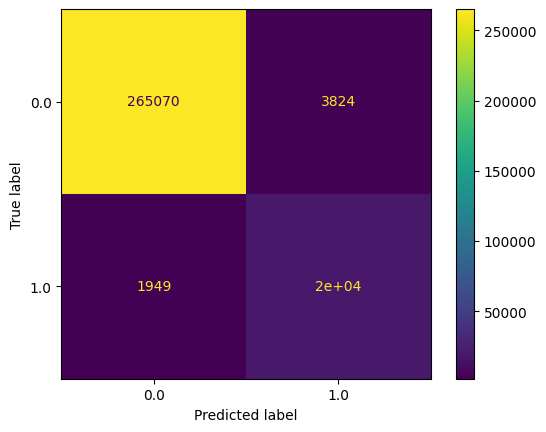

In [174]:
confusionMatrix = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,
                              display_labels=knn.classes_)
disp.plot()

In [175]:
print(accuracy_score(y_test,pred))

0.9801360506766406


## Choosing a K Value

In [179]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(Numpy.mean(pred_i != y_test))

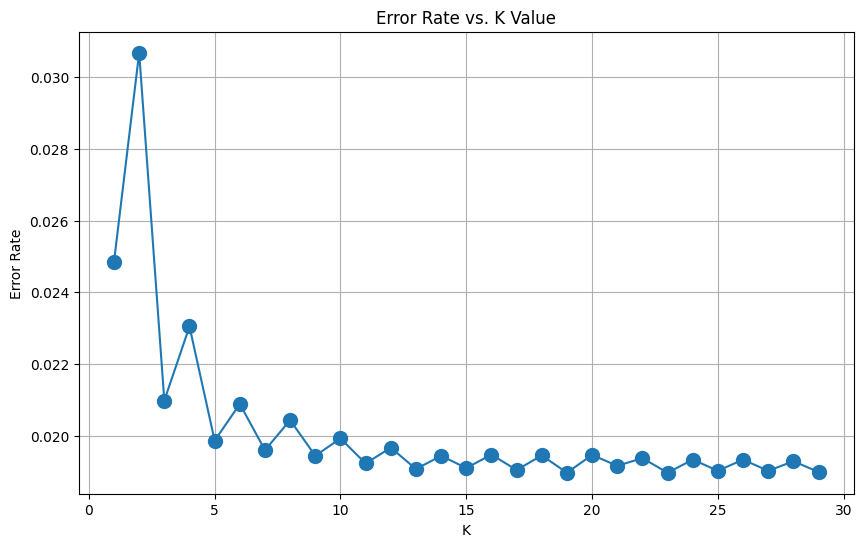

In [180]:
PyPlot.figure(figsize=(10,6))
PyPlot.plot(range(1,30), error_rate, marker='o', markersize=10)
PyPlot.title('Error Rate vs. K Value')
PyPlot.xlabel('K')
PyPlot.ylabel('Error Rate')
PyPlot.grid()